## Restaurant Rating Predictions

## Objective: 
## Building a machine learning model to predict the aggregate rating of  resturants based on other features

## Steps:
1- Preprocess the dataset by handling missing values, encoding categorical variables and splitting the data into training and testing sets.

2- Select a regression algorithm(e.g. Linear regression, decision regression) and train it on the training data.

3- Evaluate the model's preformance using appropriate regression metrics(e.g. mean squared error, R-squared error) on the training data.

4- Interpret the model's results and analyze the most influential features affecting restaurant Restaurant Ratings. 

## 1- Setting up environment and importing the libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

## Upload Dataset

In [2]:
df = pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.shape

(9551, 21)

In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Checking Missing Values

In [10]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

## Handling Missing Values

In [7]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

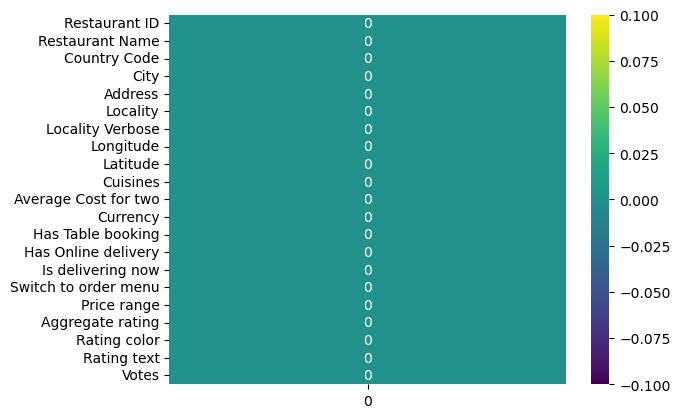

In [9]:
# Create a heatmap of missing values
sns.heatmap(df.isnull().sum().to_frame(), annot=True, cmap='viridis')
plt.show()

In [10]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [11]:
df['City'].value_counts()

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

## Histogram

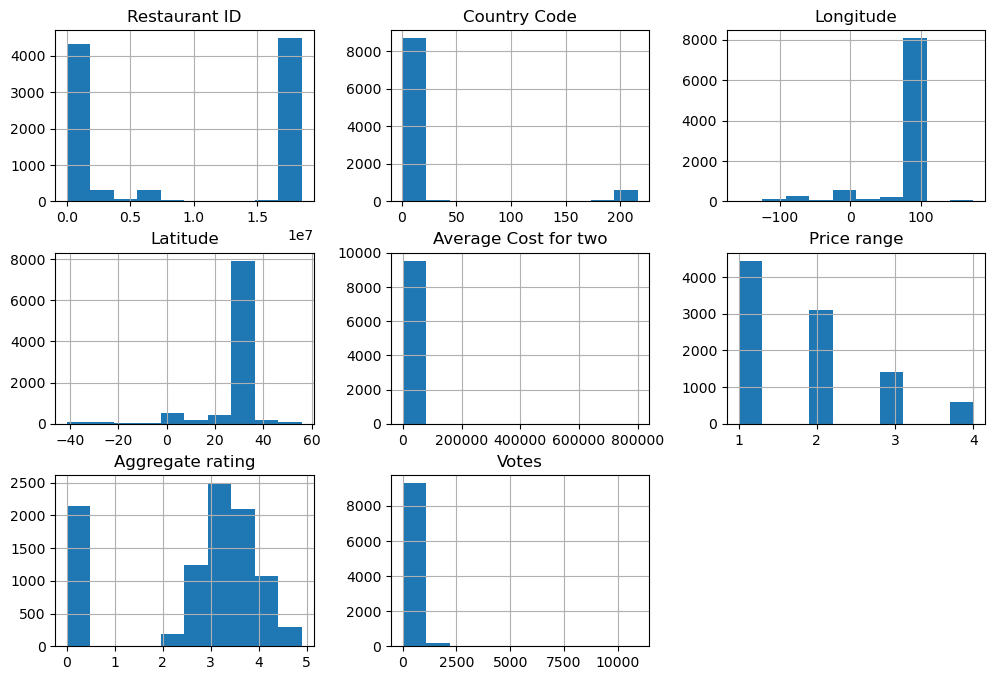

In [22]:
import matplotlib.pyplot as plt 
df.hist(figsize=(12,8))
plt.show()

## Label Encoder

Converting categorical variable into numerical

In [12]:
# Identify the categorical columns to numerical
categorical_cols = df.select_dtypes(include='object').columns

# convert categorical columns to numerical 
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[f"{col}_encoded"]= label_encoder.fit_transform(df[col])
# Drop the original categorical columns
df.drop(categorical_cols,axis=1, inplace=True)

#Now the dataset has numerical columns
df.head()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Restaurant Name_encoded,City_encoded,...,Locality_encoded,Locality Verbose_encoded,Cuisines_encoded,Currency_encoded,Has Table booking_encoded,Has Online delivery_encoded,Is delivering now_encoded,Switch to order menu_encoded,Rating color_encoded,Rating text_encoded
0,6317637,162,121.027535,14.565443,1100,3,4.8,314,3748,73,...,171,172,920,0,1,0,0,0,0,1
1,6304287,162,121.014101,14.553708,1200,3,4.5,591,3172,73,...,593,601,1111,0,1,0,0,0,0,1
2,6300002,162,121.056831,14.581404,4000,4,4.4,270,2896,75,...,308,314,1671,0,1,0,0,0,1,5
3,6318506,162,121.056475,14.585318,1500,4,4.9,365,4707,75,...,862,875,1126,0,0,0,0,0,0,1
4,6314302,162,121.057508,14.584450,1500,4,4.8,229,5523,75,...,862,875,1122,0,1,0,0,0,0,1


## Target Variable

In [13]:
# Split the data into training and testing sets 
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

## Split the data

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Standardization

Standardization (also known as Z-score normalization) scales the features so that they have a mean of 0 and standard deviation of 1.

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Initialise standardscalar 
scaler = StandardScaler()
# Fit scalar to the training data and transform the training data 
X_train_scaled = scaler.fit_transform(X_train)

#Trasform the testing data using scalar 
X_test_scaled = scaler.transform(X_test)
print("\nStandardScaler")
print(X_train_scaled)
print(X_test_scaled)


StandardScaler
[[-1.02964023 -0.30501664  0.31932321 ...  0.         -0.63907445
  -1.05832999]
 [-0.9962726  -0.30501664  0.31292726 ...  0.         -0.63907445
  -1.05832999]
 [ 1.06405892 -0.30501664  0.32126469 ...  0.          0.70227962
   0.70966734]
 ...
 [ 1.03494809 -0.30501664  0.31663209 ...  0.          0.70227962
   0.70966734]
 [-0.63262254 -0.30501664  0.33741291 ...  0.         -1.30975149
   1.88833224]
 [-1.03036444 -0.30501664  0.31588245 ...  0.          1.37295665
   0.1203349 ]]
[[-1.03015173 -0.30501664  0.31506784 ...  0.          0.03160258
   1.29899979]
 [ 1.06222611 -0.30501664  0.31427703 ...  0.         -1.30975149
   1.88833224]
 [-0.99538797 -0.30501664  0.32014674 ...  0.         -0.63907445
  -1.05832999]
 ...
 [ 1.06393977 -0.30501664  0.32113597 ...  0.         -0.63907445
  -1.05832999]
 [ 1.06481042 -0.30501664  0.32656053 ...  0.         -1.30975149
   1.88833224]
 [ 0.93811312  3.48771868 -3.72545618 ...  0.         -1.30975149
   1.88833224]]


## Training and Testing data to predict Restaurant rating

we are going to train three machine learning algorithms:

1- Linear Regression Model

2- Decision Tree Regressor 

3- Random Forest Regressor 

4- Linear Regression Model  

In [16]:
from sklearn.linear_model import LinearRegression 
# Train a linear regression model 
lr = LinearRegression()
lr.fit(X_train, y_train)
#predict the test data 
y_pred = lr.predict(X_test)

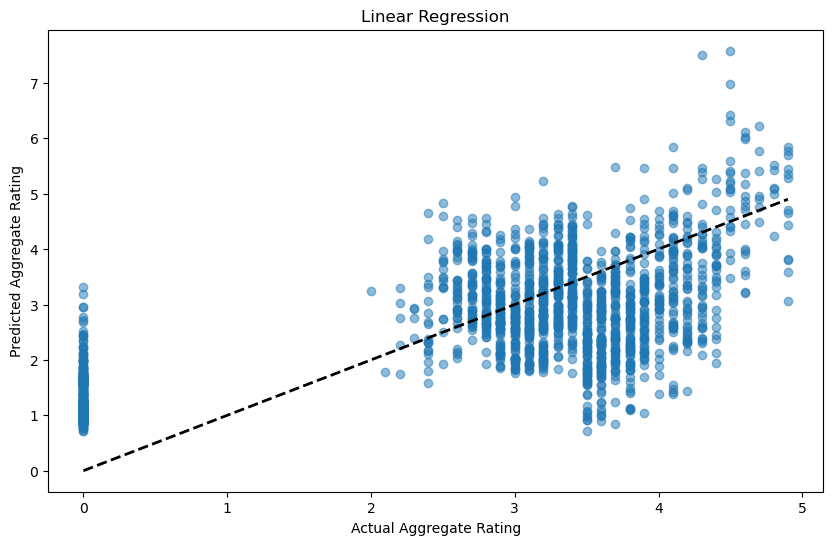

Cofficient: [-3.72724341e-08  6.64563182e-03  8.82072656e-04 -1.24175150e-03
  1.39313419e-06  4.95677680e-01  4.86479410e-04  2.21753697e-06
 -3.03138338e-03 -2.23524368e-05 -3.70632830e-04  7.52688595e-05
 -2.07541286e-04 -8.40778009e-02 -6.53048395e-03  6.76117009e-01
 -3.56217318e-02  0.00000000e+00 -1.95193715e-01 -1.98414451e-01]
Intercept: 3.70


In [18]:
# Plot the linear regression graph 
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--',lw=2)
plt.xlabel('Actual Aggregate Rating')
plt.ylabel('Predicted Aggregate Rating')
plt.title('Linear Regression')
plt.show()

#Get the cofficient and intercept 
coef = lr.coef_
intercept = lr.intercept_

#print the coefficient and intercept
print(f"Cofficient: {coef}")
print(f"Intercept: {intercept:.2f}")

## Evaluate the Model 

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate the evaluation metrics 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

#print the results 
print(f"Mean Squared Error : {mse:.2f}")
print(f"Mean Absolute Error : {mae:.2f}")
print(f"R-Squared : {r2:.2f}")

Mean Squared Error : 1.22
Mean Absolute Error : 0.92
R-Squared : 0.46


## Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
# Train a decision tree model 

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

#predict the test data 
y_pred = dtr.predict(X_test)

## Evaluate the Model 

In [23]:
# Calculate the evaluation metrics 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

#print the results 
print(f"Mean Squared Error : {mse:.2f}")
print(f"Mean Absolute Error : {mae:.2f}")
print(f"R-Squared : {r2:.2f}")

Mean Squared Error : 0.06
Mean Absolute Error : 0.15
R-Squared : 0.98


## Graph of Decision tree

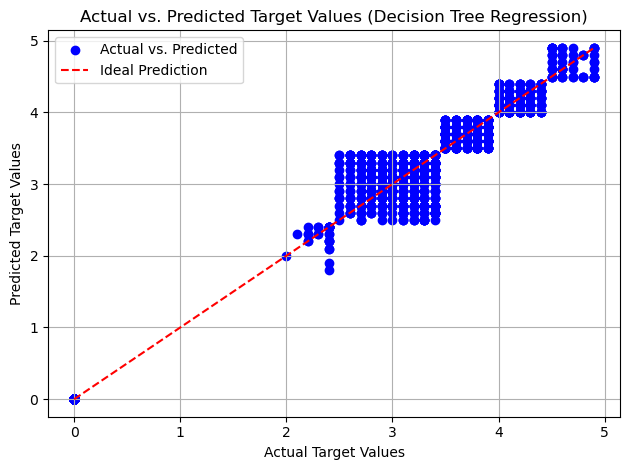

In [25]:
plt.scatter(y_test,y_pred, color='blue', label= 'Actual vs. Predicted')

#Add Labels and title 
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs. Predicted Target Values (Decision Tree Regression)')

# Add a diagonal line for reference 

plt.plot([min(y_test), max(y_test)], [min(y_test) ,max(y_test)], color='red',linestyle= '--', label= 'Ideal Prediction')

#Add Legend
plt.legend()

#show plot 
plt.grid(True)
plt.tight_layout()
plt.show()

## Random Forest Regressor 

In [27]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

#predict the test data 
y_pred = rfr.predict(X_test)

#Calculate the evaluation metrics 
mae = mean_squared_error(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

#print the results 
print(f"Mean Squared Error : {mse:.2f}")
print(f"Mean Absolute Error : {mae:.2f}")
print(f"R-Squared : {r2:.2f}")

Mean Squared Error : 0.11
Mean Absolute Error : 0.03
R-Squared : 0.99


## Graph of Random Forest Regressor

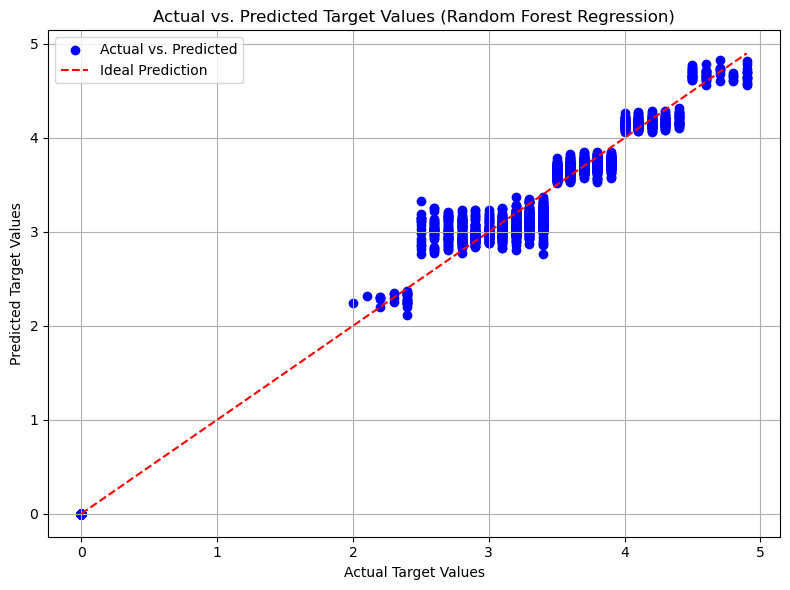

In [28]:
# Create scatter plot 
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred, color='blue', label= 'Actual vs. Predicted')

#Add Labels and title 
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs. Predicted Target Values (Random Forest Regression)')

# Add a diagonal line for reference 

plt.plot([min(y_test), max(y_test)], [min(y_test) ,max(y_test)], color='red',linestyle= '--', label= 'Ideal Prediction')

#Add Legend
plt.legend()

#show plot 
plt.grid(True)
plt.tight_layout()
plt.show()

Interpret the model's results and analyse the most 

Influential features affecting restaurant ratings.

In [31]:
# Interpret the model's results 
feature_importance = pd.Series(lr.coef_, index= X.columns).sort_values(ascending=False)
print('\nMost Influential features: ')
print(feature_importance.head(5))


Most Influential features: 
Has Online delivery_encoded    0.676117
Price range                    0.495678
Country Code                   0.006646
Longitude                      0.000882
Votes                          0.000486
dtype: float64


## Conclusion:

Our study showed how picking the right features and checking the models are super important for prediction Restaurant rating well.